In [1]:
from src.problems.memory_reveal_cards_game import MemoryGame
from src.choices.logChoice import LogChoice
from src.choices.bigChoice import BigChoice
from src.choicesParameters.fixedParameters import FixedParameters
from src.choicesParameters.metaheuristicParameters import PSOParameters
from src.choicesParameters.transformerParameters import TransformerParametersSVD

In [8]:
choice = LogChoice()
choiceParameters = FixedParameters()

def fitness(p, problem):
    total = 0
    count = 10
    ol = 0

    choiceParameters.set(p[0])

    for i in range(count):
        cards = problem.random_cards()
        v = problem.run(cards)

        if v == problem.limit:
            ol += 1
        else:
            total += v

    if count > ol:
        return ol + 2 * (total / (count - ol)) / problem.limit
    else:
        return ol + 2

In [3]:
def test(choice, choiceParameters, pf):
    problem = MemoryGame(choice, choiceParameters, pf, 20, 1000)
    total = 0
    count = 100
    ol = 0

    for i in range(count):
        cards = problem.random_cards()
        v = problem.run(cards)

        if v == problem.limit:
            ol += 1
        else:
            total += v

    if count > ol:
        return total / (count - ol), ol
    else:
        return problem.limit, ol

In [5]:
ps = []
rs = []

In [ ]:
for pf in [0, 0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]:
    problem = MemoryGame(choice, choiceParameters, pf, 20, 50)

    psoParameters = PSOParameters()

    score, p = psoParameters.fit(lambda p : fitness(p, problem), choice.apply_constraints, 2, 10, 15)
    print(score, p)

    ps.append((p[0], p[1]))

    avg, ol = test(choice, psoParameters, pf)
    print(avg, ol)

    rs.append((avg, ol))

In [ ]:
for pf in [i * 0.01 for i in range(10)] + [min((i + 1) * 0.1, 1.0) for i in range(10)]:
    m = min([(abs(p - pf), p_i) for p_i, p in enumerate([0, 0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0])], key=lambda v: v[0])[1]
    choiceParameters.set(ps[m])
    avg, ol = test(choice, choiceParameters, pf)
    print(avg, ol)

    rs.append((avg, ol))

In [10]:
brs = []

In [ ]:
bigChoice = BigChoice()

for pf in [i * 0.01 for i in range(10)] + [min((i + 1) * 0.1, 1.0) for i in range(10)]:
    avg, ol = test(bigChoice, choiceParameters, pf)
    print(avg, ol)

    brs.append((avg, ol))

In [ ]:
bigChoice = BigChoice()

for pf in [0, 0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]:
    avg, ol = test(bigChoice, choiceParameters, pf)
    print(avg, ol)

    brs.append((avg, ol))

In [13]:
def get_sequences_from_start(list, top=4):
    return [list[:pos + 1] for pos in range(min(top, len(list)))]

In [14]:
X = []
Y = []

In [16]:
for i, pf in enumerate([0, 0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]):
    problem = MemoryGame(choice, choiceParameters, pf, 20, 50)
    choiceParameters.set(ps[i])

    cards = problem.random_cards()

    for _ in range(5):
        problem.run(cards)

        x = get_sequences_from_start(problem.embeddings) + [problem.embeddings]
        X.extend(x)
        Y.extend([ps[i]] * len(x))

In [18]:
transformerParameters = TransformerParametersSVD(2)

In [ ]:
preds, error = transformerParameters.train(X, Y)
print(error)

In [20]:
trs = []

In [ ]:
for pf in [i * 0.01 for i in range(10)] + [min((i + 1) * 0.1, 1.0) for i in range(10)]:
    avg, ol = test(choice, transformerParameters, pf)
    print(avg, ol)

    trs.append((avg, ol))

In [ ]:
for pf in [0, 0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 0.8, 1.0]:
    avg, ol = test(choice, transformerParameters, pf)
    print(avg, ol)

    trs.append((avg, ol))

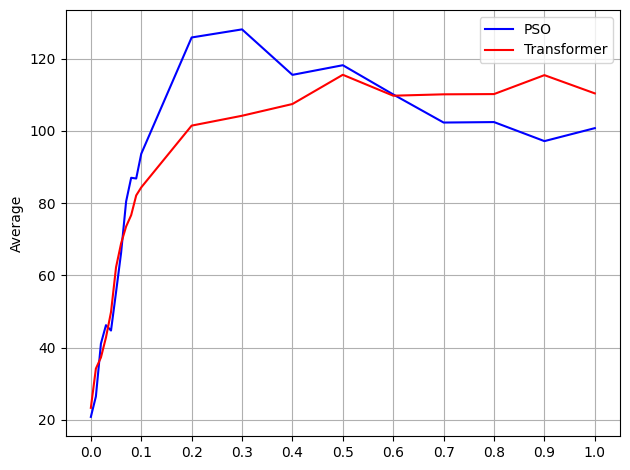

In [88]:
import numpy as np
import matplotlib.pyplot as plt

xData = np.array([i * 0.01 for i in range(10)] + [min((i + 1) * 0.1, 1.0) for i in range(10)])

fig, ax1 = plt.subplots()

line1 = ax1.plot(xData, [val[0] for val in rs], 'b-', label='PSO')
line3 = ax1.plot(xData, [val[0] for val in trs], 'r-', label='Transformer')

ax1.set_ylabel('Average')
ax1.tick_params(axis='y')

all_lines = line1 + line3
all_labels = [ln.get_label() for ln in all_lines]

ax1.legend(all_lines, all_labels, loc='best')

plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

plt.grid(True)
plt.tight_layout()
plt.show()


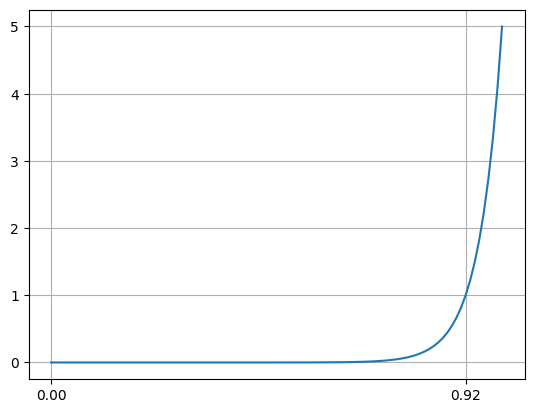

In [91]:
import numpy as np
import matplotlib.pyplot as plt

index_ps = 1

xs = np.linspace(0, 1, 100)
f = lambda xs, a, b: [5 * (a ** (x / b) - 1) / (a ** (1 / b) - 1) for x in xs]

ys = f(xs, ps[index_ps][0], ps[index_ps][1])
plt.plot(xs, ys)

find_x = lambda v: round(xs[min([(abs(y - v), i) for i, y in enumerate(ys)])[1]], 2)

ticks_positions = [0, find_x(1)]

plt.xticks(ticks_positions, None)

plt.grid(True)
plt.show()